## Create bar chart (display variant count based on position for each gene- 34x, do only for Vietnamese population first)

In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path
import numpy as np

In [14]:
from mylib import genomes

In [15]:
root_dir = join(Path.home(),"cp_als/populations")

In [16]:
df = pd.read_csv(join(root_dir,"output/KHV/all.csv"))

In [17]:
df.head()

,#CHROM,POS,REF,ALT,FILTER,INFO,FORMAT,HG02069,HG01846,HG02078,...,INFO:AF,INFO:EAS_AF,INFO:EUR_AF,INFO:AFR_AF,INFO:AMR_AF,INFO:SAS_AF,INFO:VT,INFO:NS,INFO:EX_TARGET,gene
0,1,11012865,C,G,PASS,AC=2;AN=5096;DP=15710;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0,0,0,...,0.0,0.00,0.00,0.0,0.00,0.00,SNP,2548,NaN,TARDBP
1,1,11013660,A,G,PASS,AC=1;AN=5096;DP=85803;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0,0,0,...,0.0,0.00,0.00,0.0,0.00,0.00,SNP,2548,NaN,TARDBP
2,1,11013784,A,G,PASS,AC=1;AN=5096;DP=244101;AF=0;EAS_AF=0;EUR_AF=0;...,GT,0,0,0,...,0.0,0.00,0.00,0.0,0.00,0.00,SNP,2548,NaN,TARDBP
3,1,11014288,T,G,PASS,AC=6;AN=5096;DP=26863;AF=0;EAS_AF=0.01;EUR_AF=...,GT,0,0,0,...,0.0,0.01,0.00,0.0,0.00,0.00,SNP,2548,NaN,TARDBP
4,1,11014525,A,G,PASS,AC=517;AN=5096;DP=25686;AF=0.1;EAS_AF=0.21;EUR...,GT,0,0,0,...,0.1,0.21,0.02,0.1,0.04,0.12,SNP,2548,NaN,TARDBP


In [18]:
df = df[genomes["KHV"]+["POS","c1s","c_sum","gene"]]

In [19]:
df.head()

,HG02069,HG01846,HG02078,HG01851,HG01865,HG01862,HG02137,HG02050,HG02019,HG02029,...,HG01840,HG01841,HG01596,HG02141,HG02067,HG02057,POS,c1s,c_sum,gene
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11012865,2,99,TARDBP
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11013660,1,99,TARDBP
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11013784,1,99,TARDBP
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,11014288,5,99,TARDBP
4,0,0,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,11014525,40,99,TARDBP


In [20]:
df.shape

(8656, 103)

In [21]:
gene_names = list(df['gene'].unique())
gene_names.sort()

In [23]:
gene_names

['ALS2',
 'ANG',
 'ATXN2',
 'C19ORF12',
 'C9ORF72',
 'CHCHD10',
 'CHMP2B',
 'CHRNA3',
 'CREST',
 'DAO',
 'DCTN1',
 'ELP3',
 'ERBB4',
 'EWSR1',
 'FIG4',
 'FUS',
 'MATR3',
 'NEFH',
 'NEK1',
 'OPTN',
 'PFN1',
 'PNPLA6',
 'PON1-3',
 'PRPH',
 'SETX',
 'SIGMAR1',
 'SOD1',
 'SPG11',
 'SQSTM1',
 'TAF15',
 'TARDBP',
 'TUBA4A',
 'VAPB',
 'VCP',
 'hnRNPA2B1',
 'hnRNPa1']

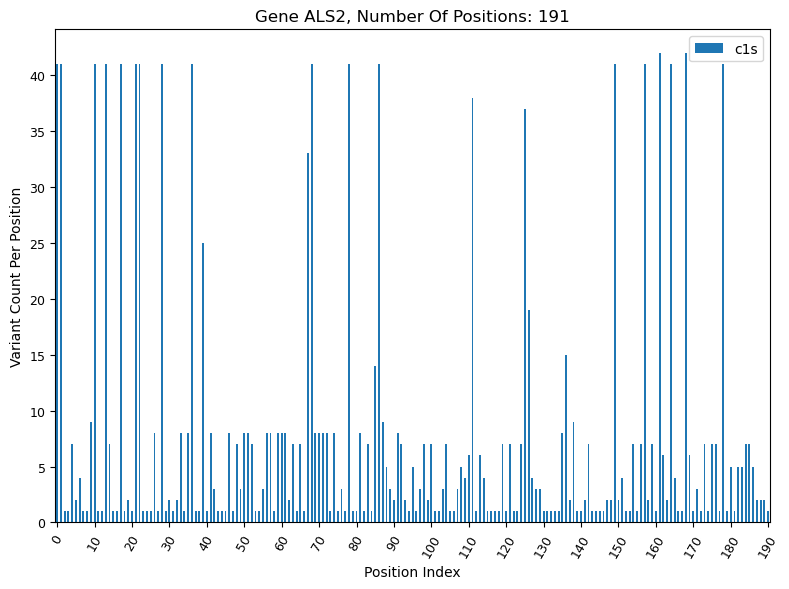

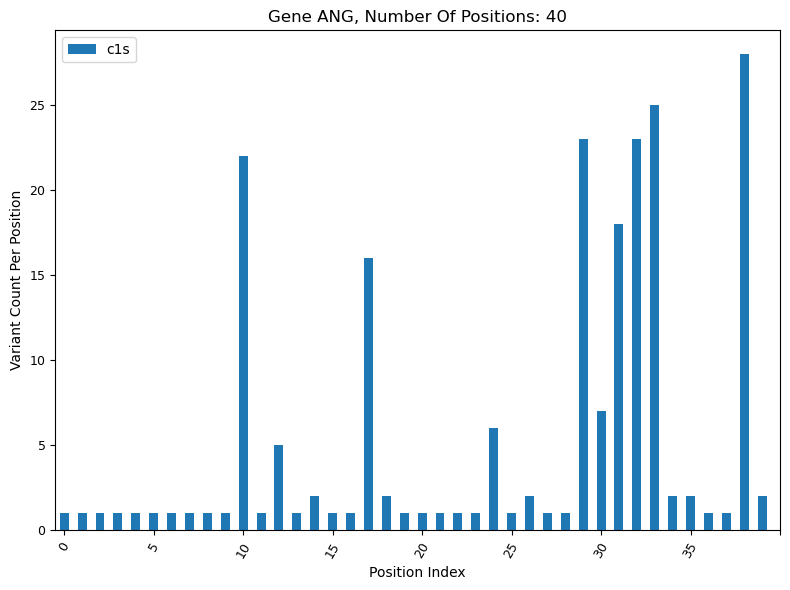

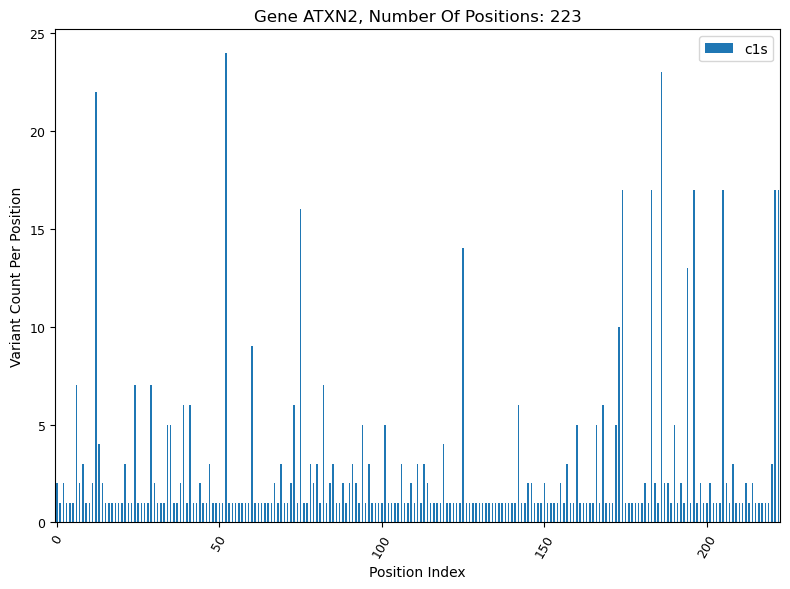

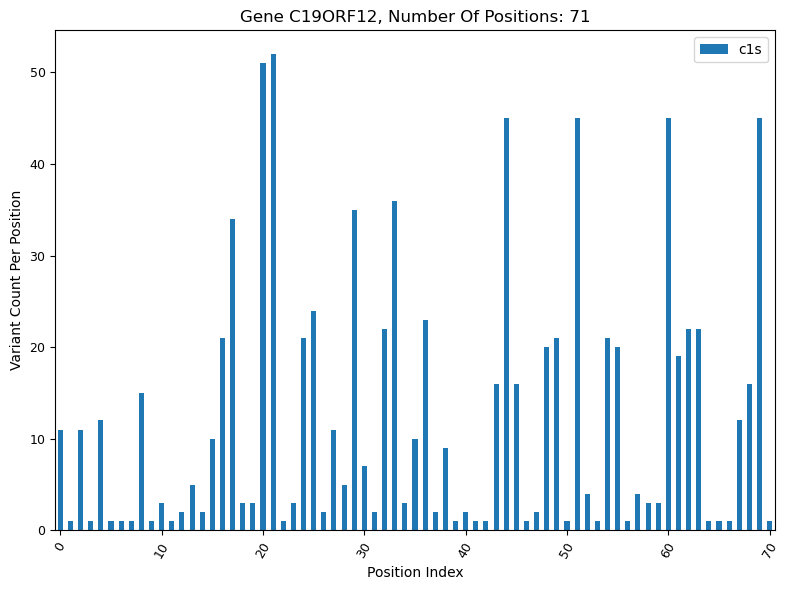

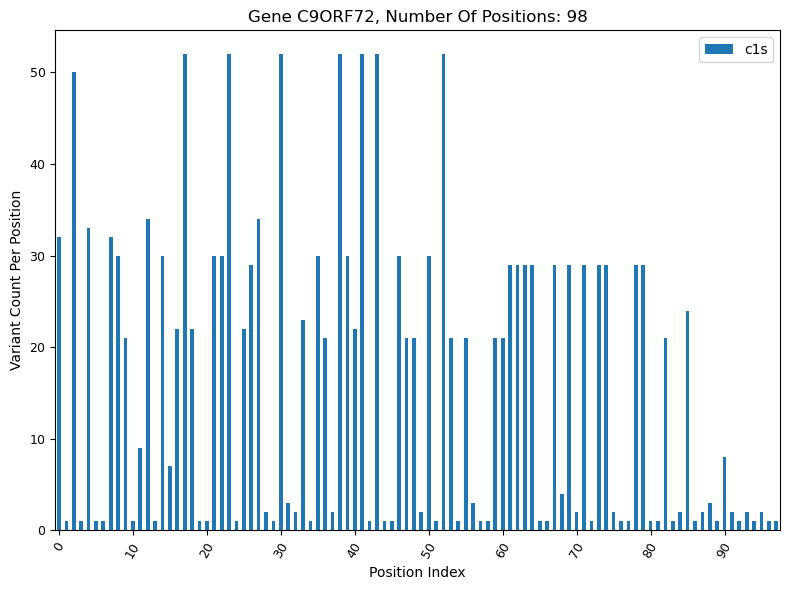

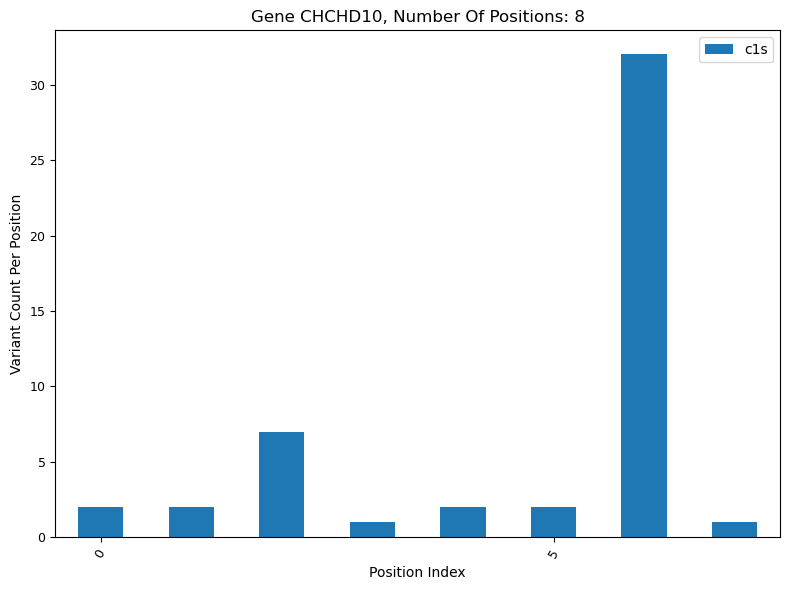

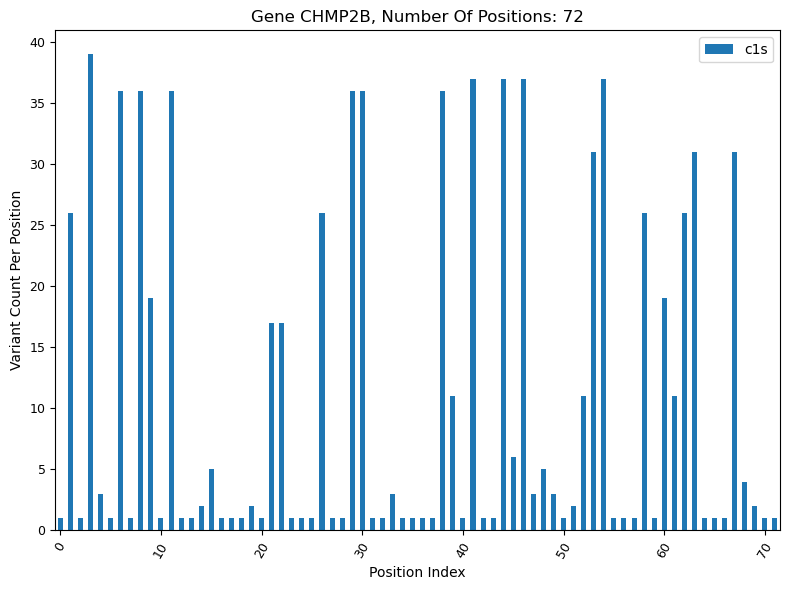

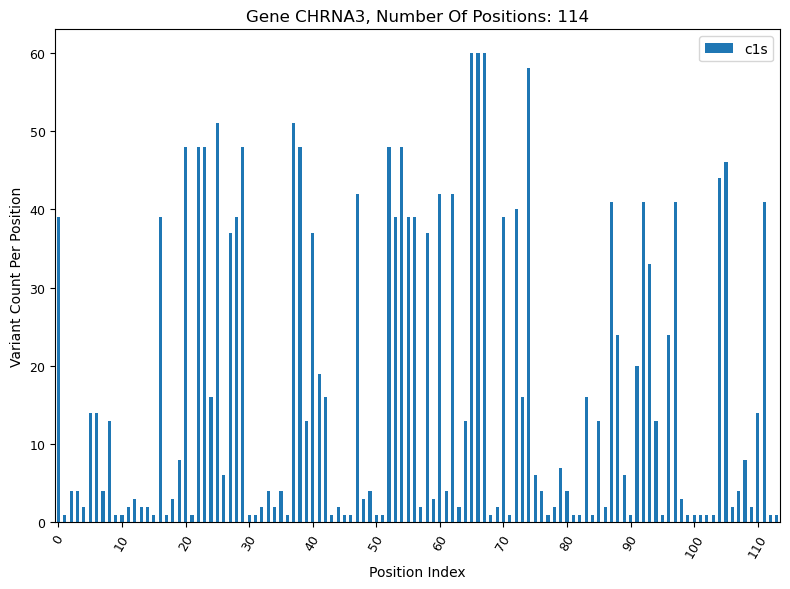

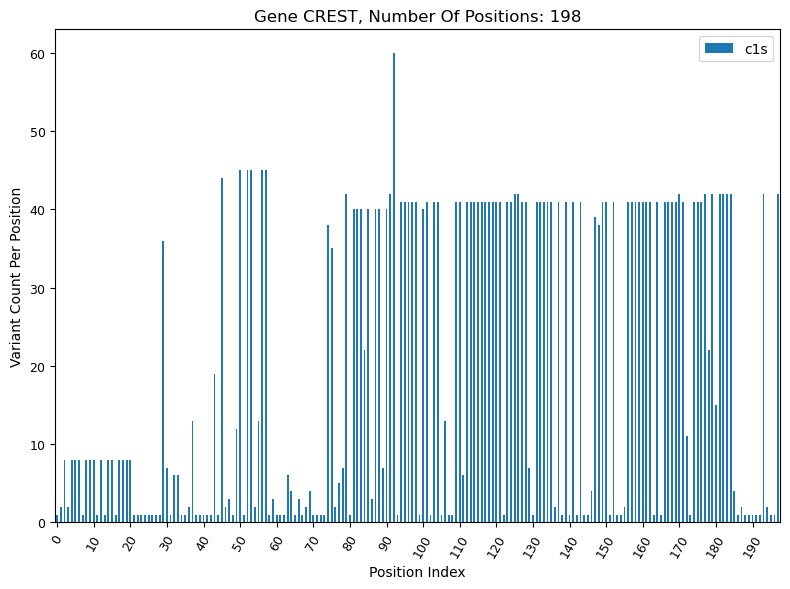

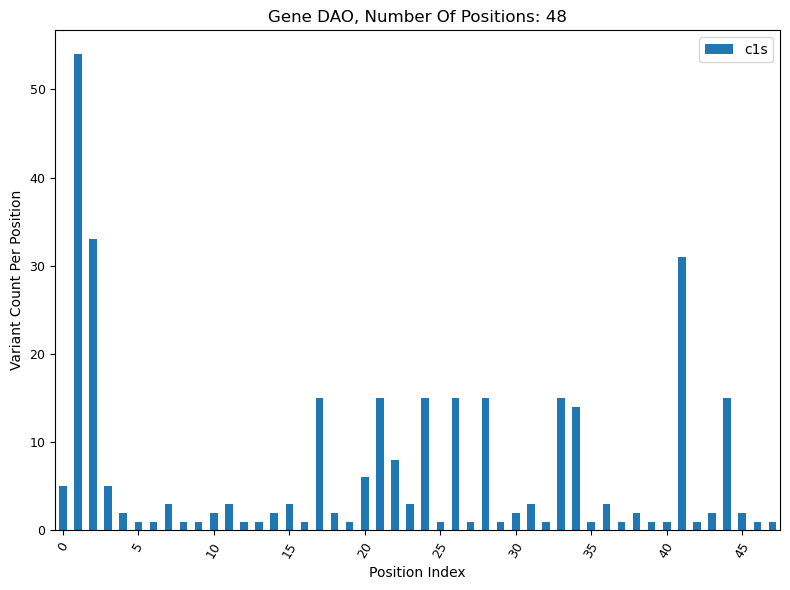

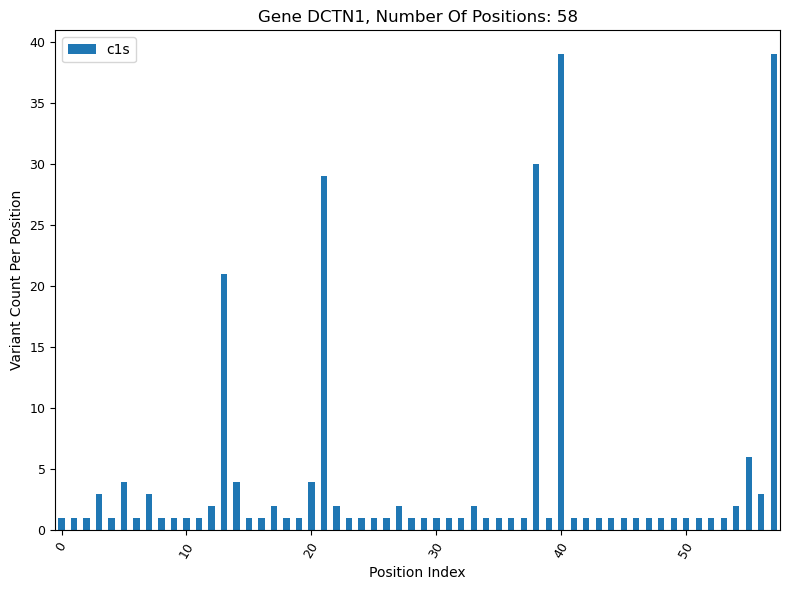

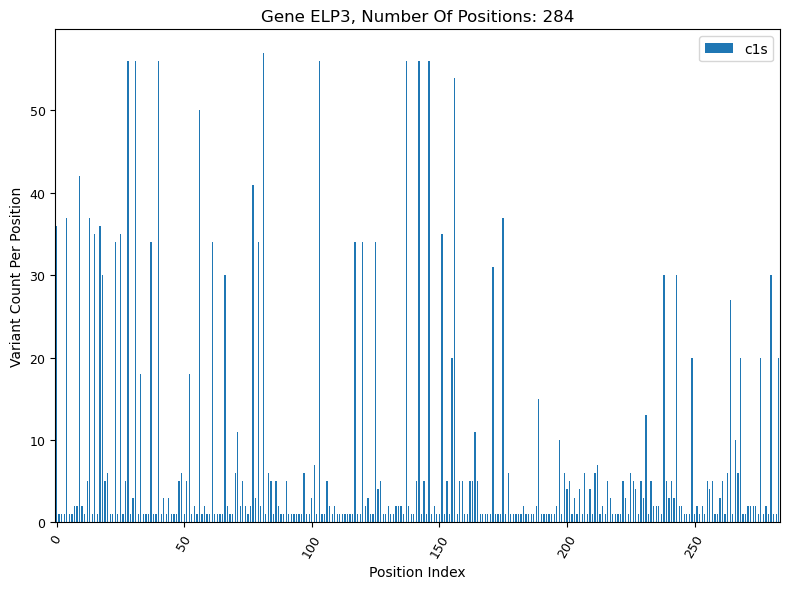

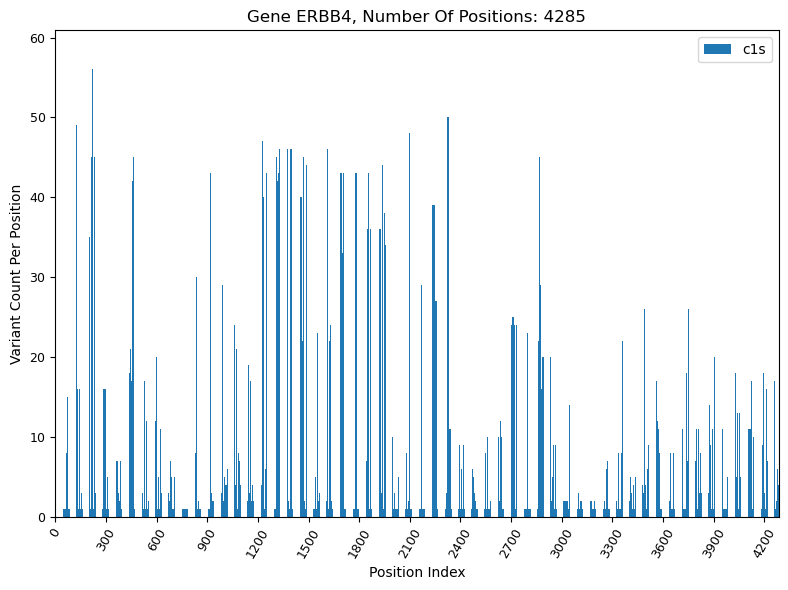

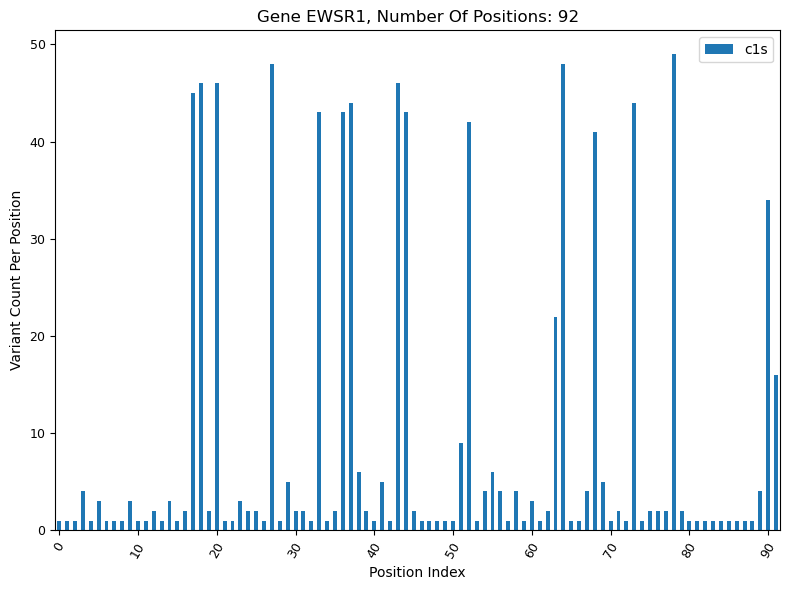

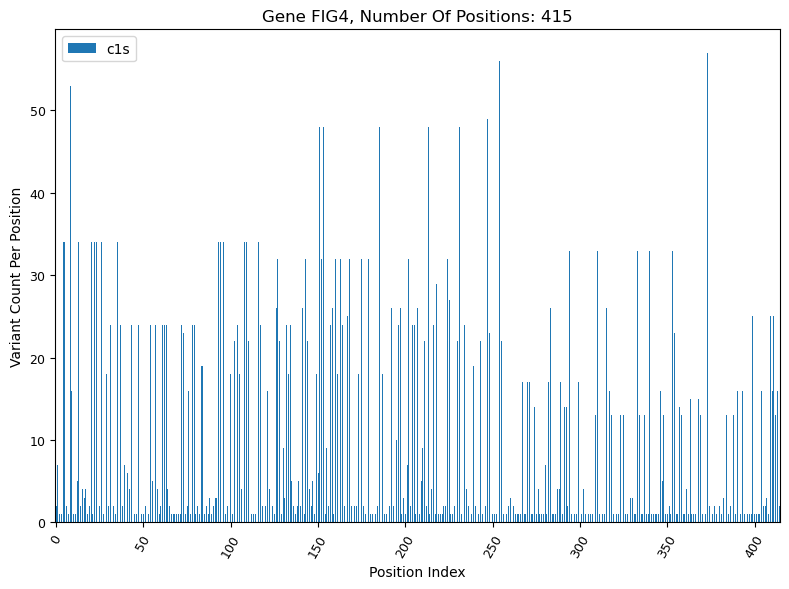

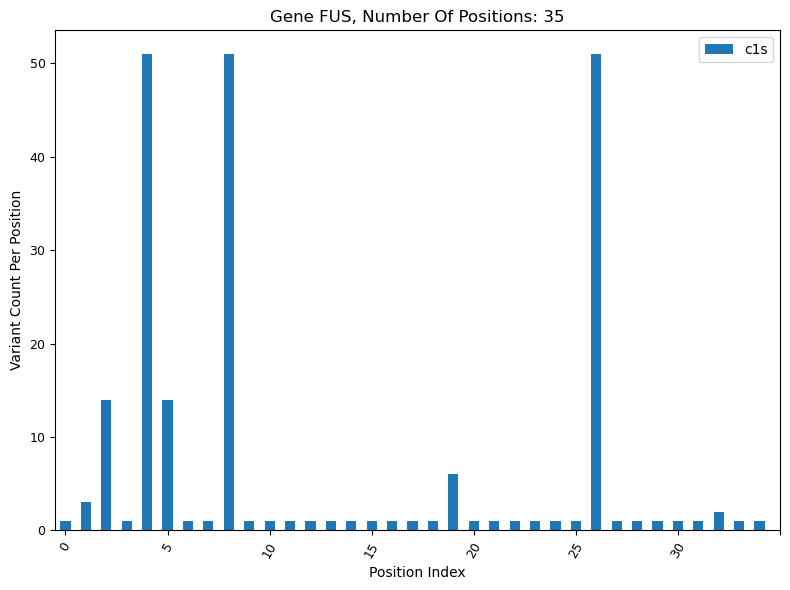

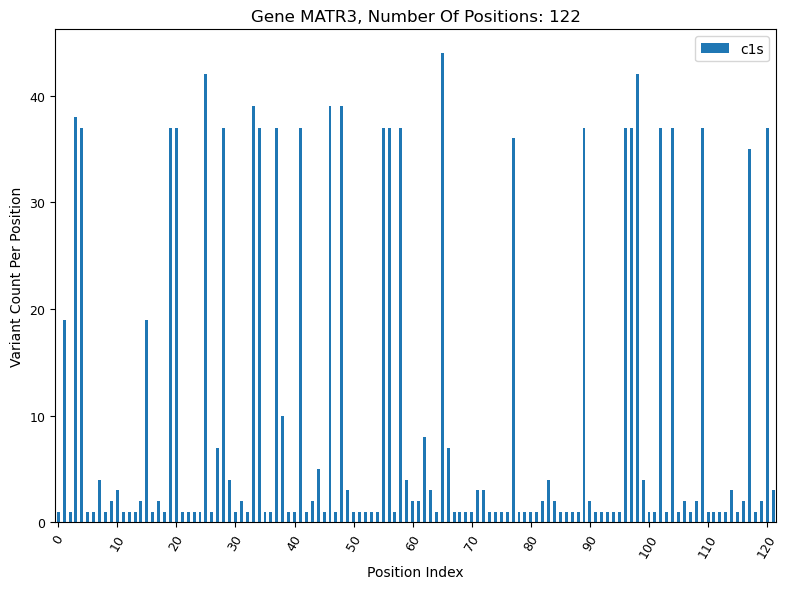

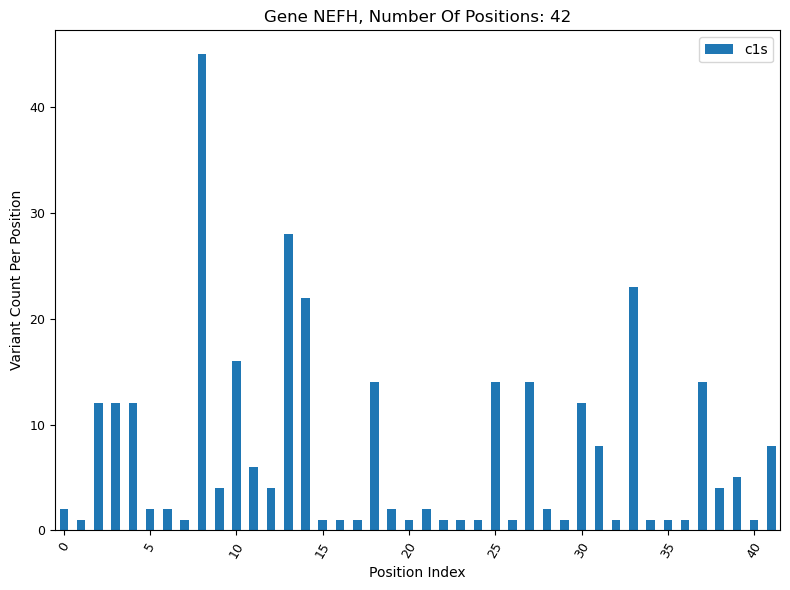

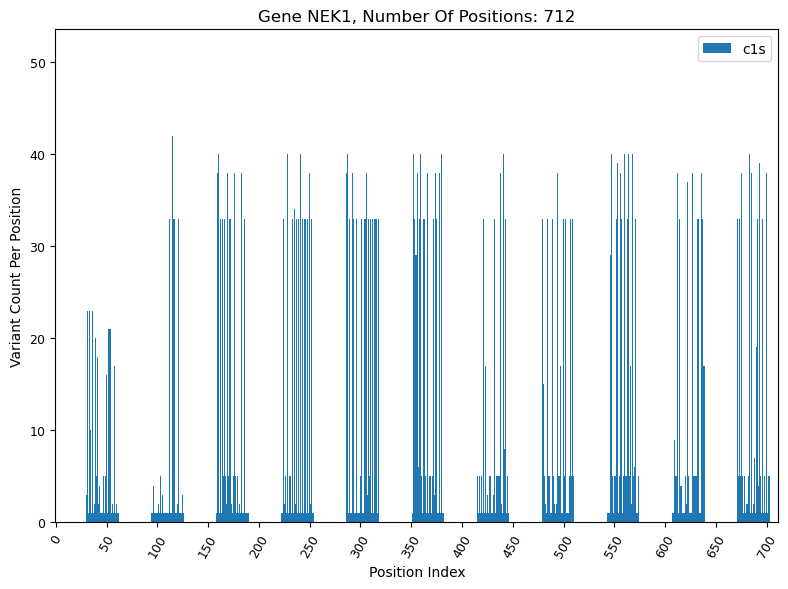

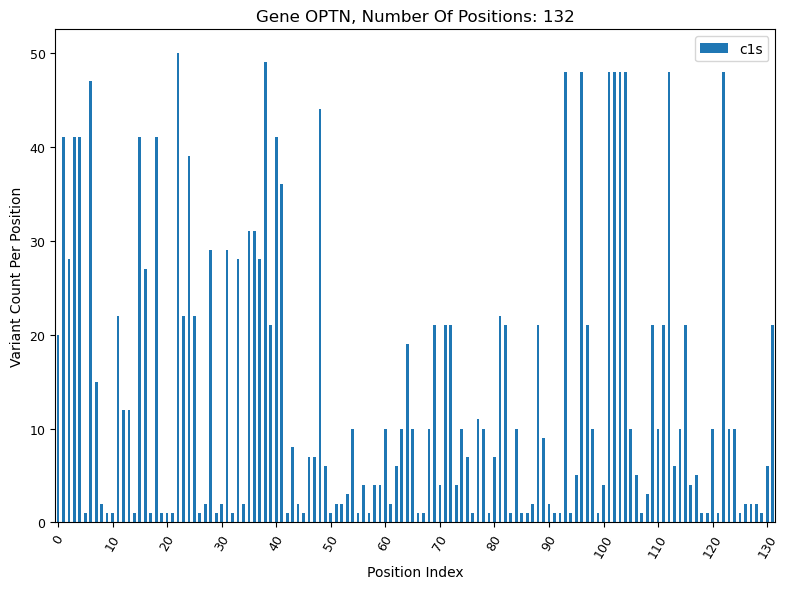

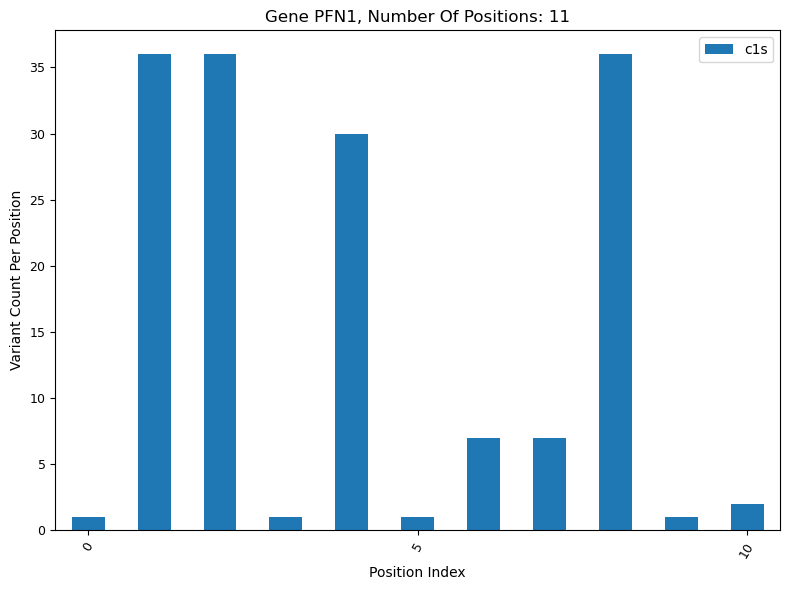

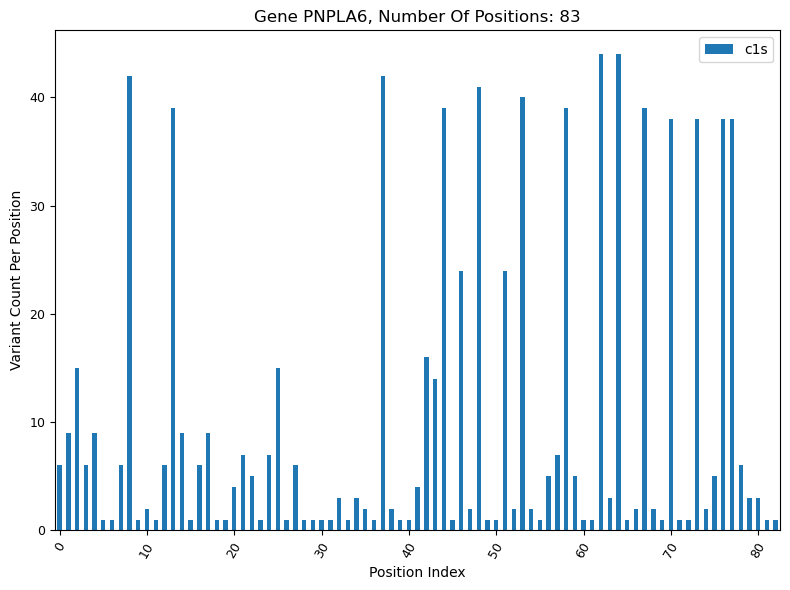

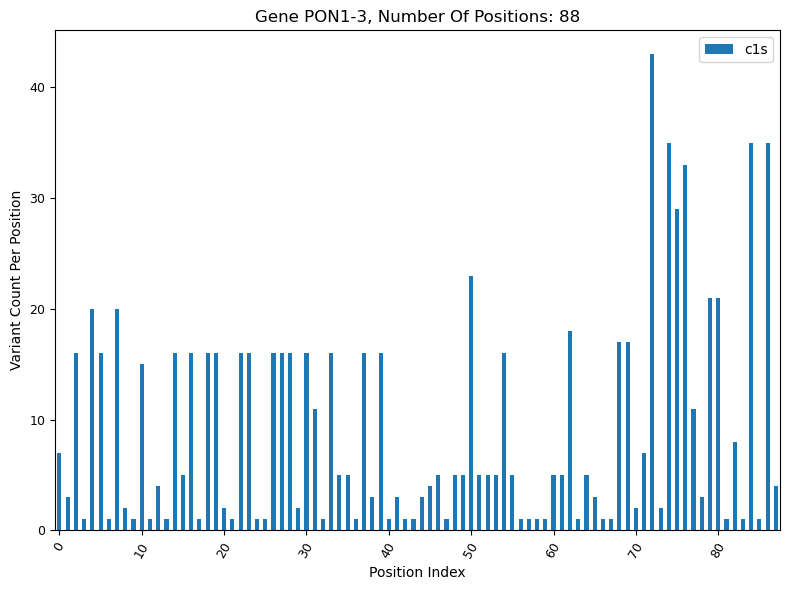

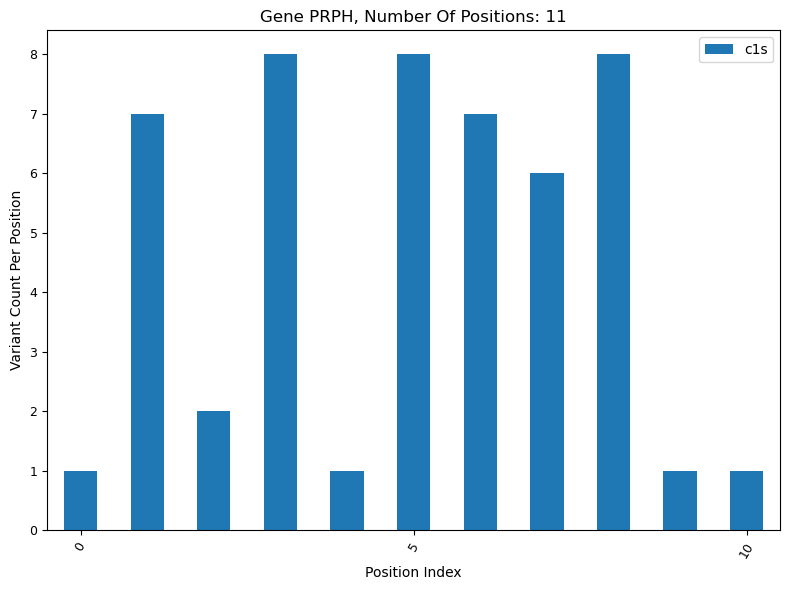

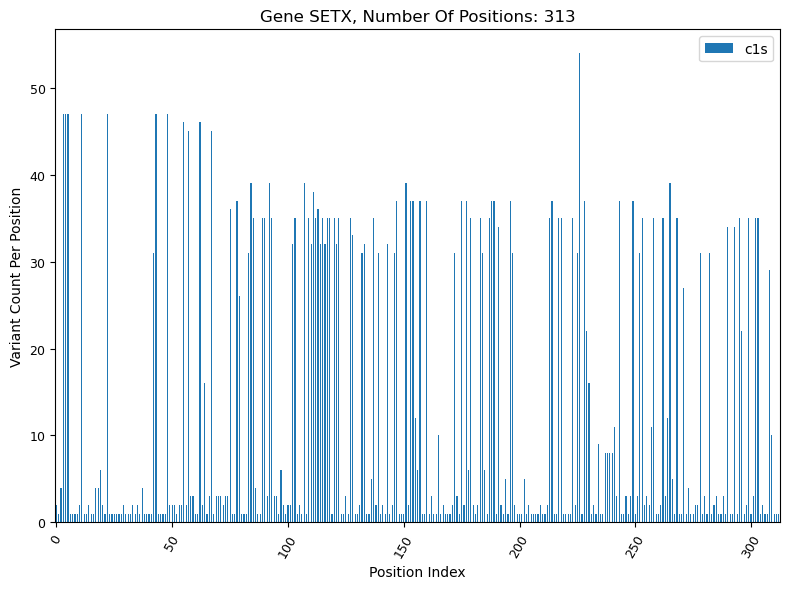

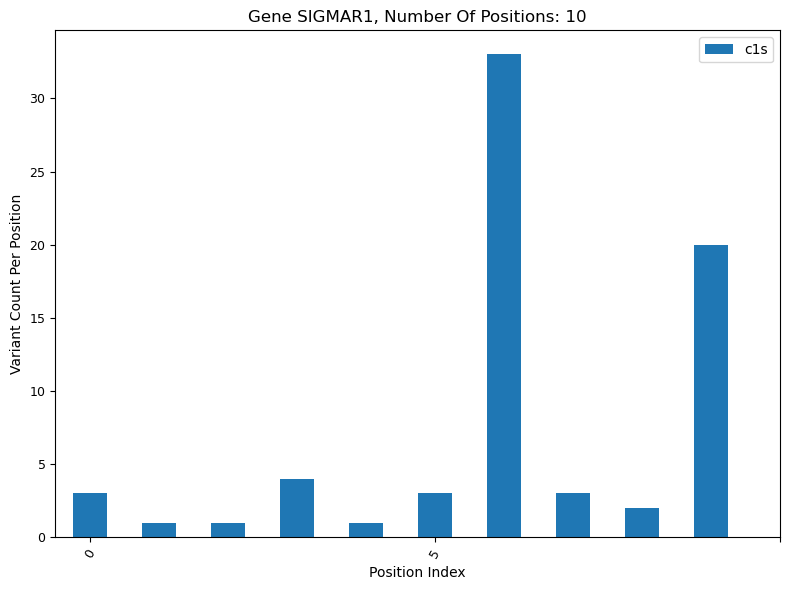

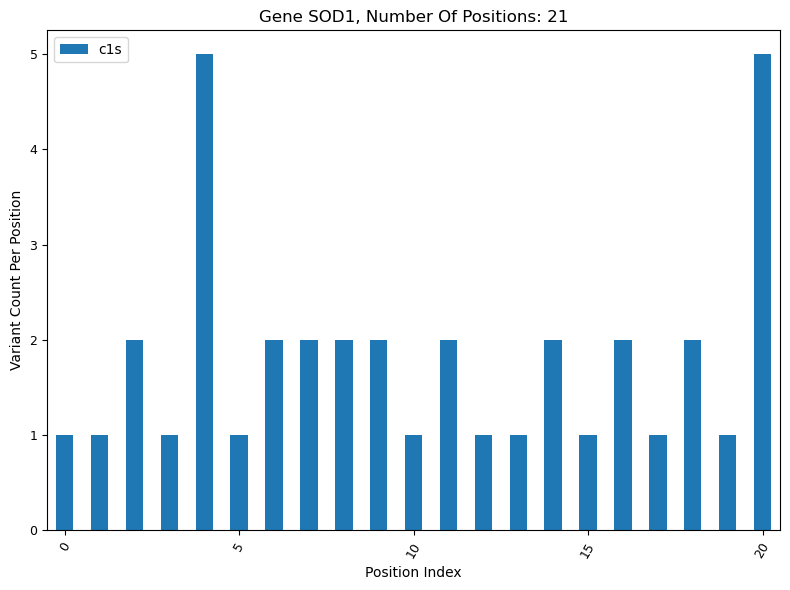

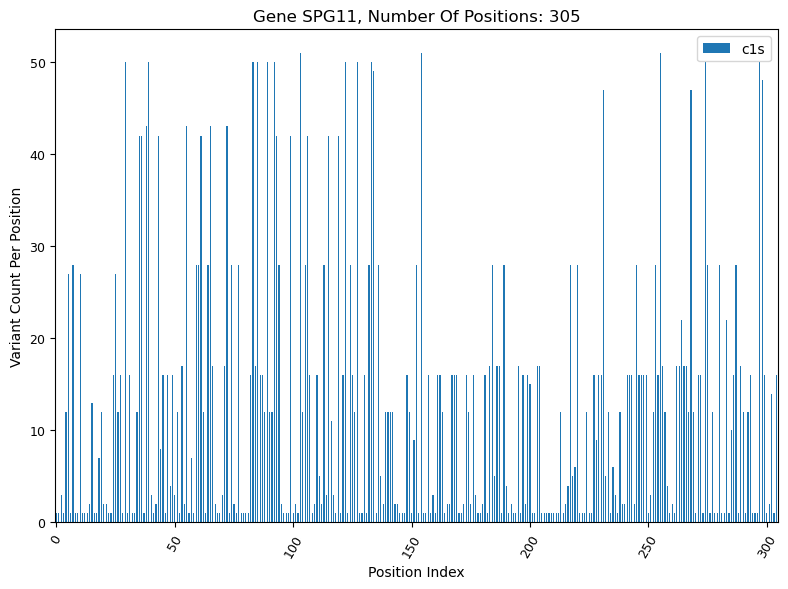

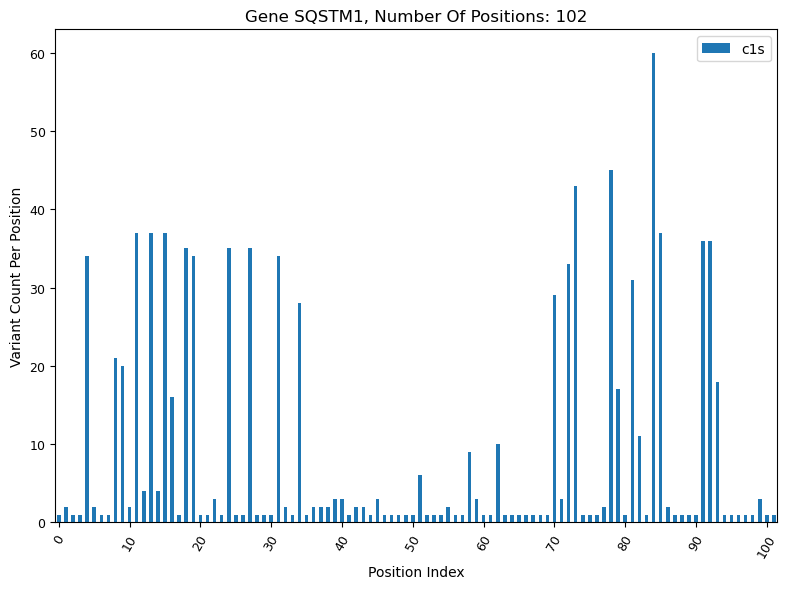

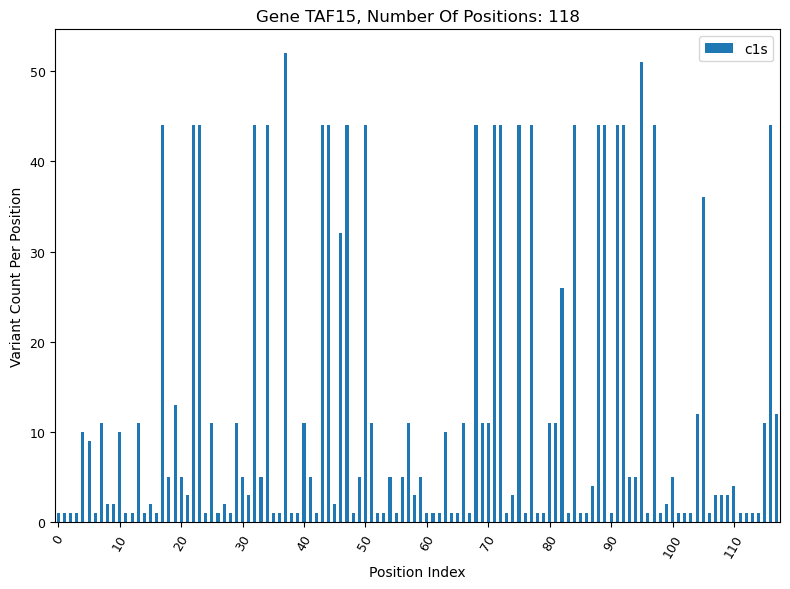

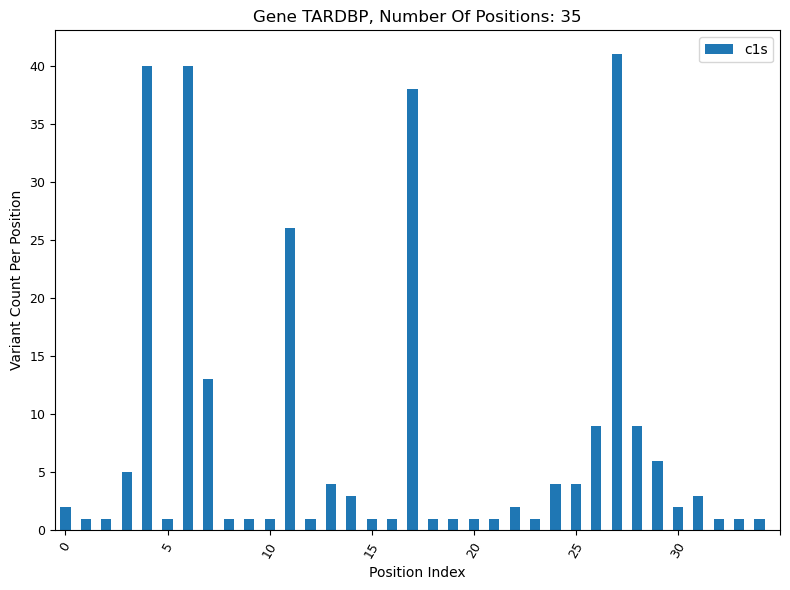

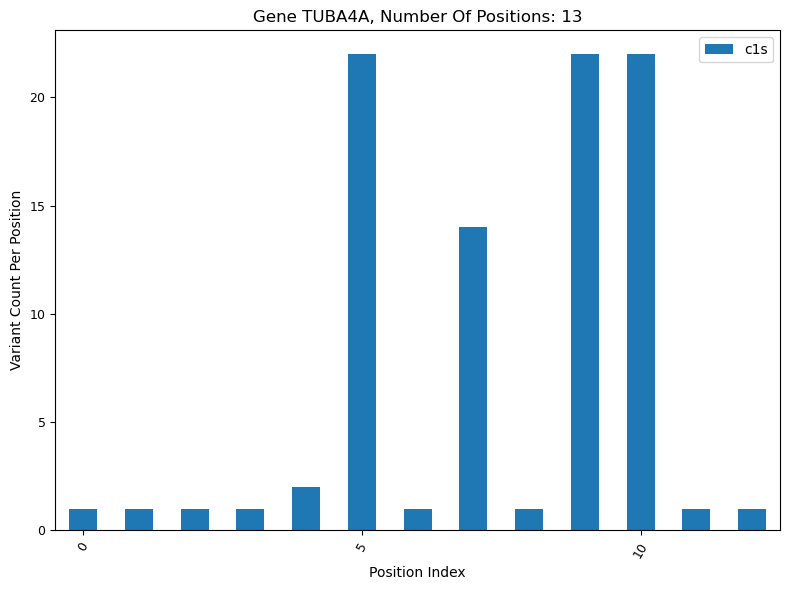

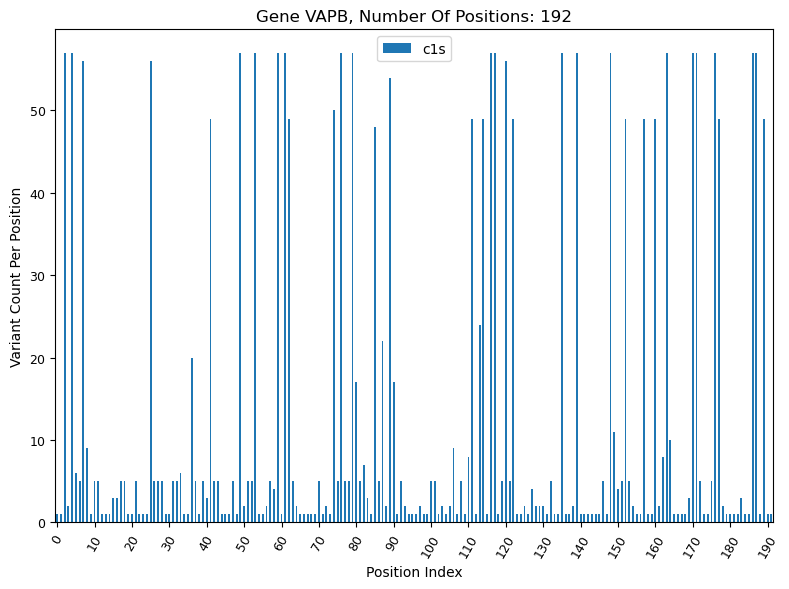

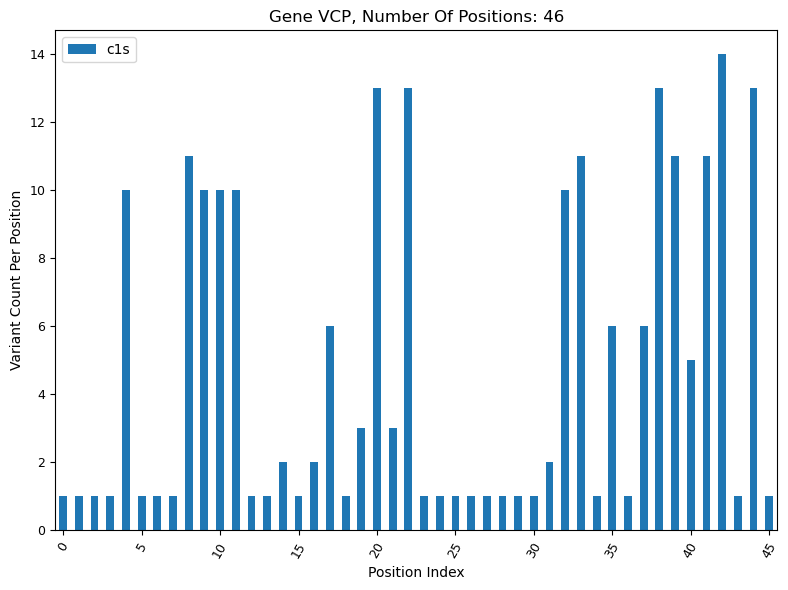

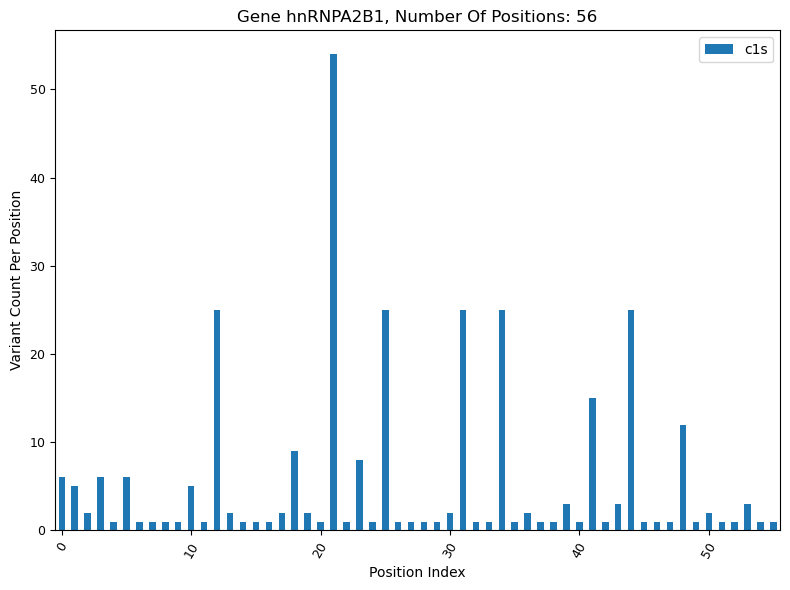

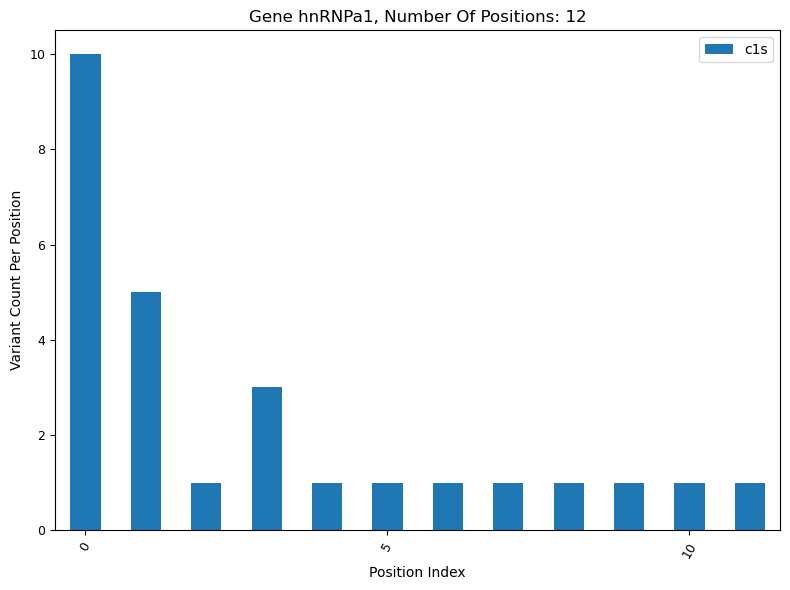

In [30]:
for gene in gene_names:
    gdf = df[df['gene']==gene][['POS','c1s']]
    gdf["x"] = range(gdf.shape[0])

    ax = gdf.plot(kind='bar',y='c1s',x="x",figsize=(8,6),fontsize=9)
    ax.set_title(f"Gene {gene}, Number Of Positions: {gdf.shape[0]}")
    ax.set_xlabel(f"Position Index")
    ax.set_ylabel(f"Variant Count Per Position")

    if gdf.shape[0] < 50:
        interval = 5 
    elif gdf.shape[0] < 200:
        interval = 10
    elif gdf.shape[0] < 1000:
        interval = 50
    else:
        interval = 300

    plt.xticks(np.arange(0,gdf.shape[0] + 1, interval),rotation=60)
    plt.tight_layout()
    plt.show()